## Homework 4

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

$1$. Let $p$ denote the probability that a particular item $A$ appears in a simple random sample (SRS). Suppose we collect 5 independent simple random samples, i.e.,  each SRS is obtained by drawing from the entire population. Let $X$ denote the random variable for the total number of times that $A$ appears in these 5 samples. What is the expected value of $X$, i.e., $\mathbb{E}[X]$? Note that your answer should be in terms of p. 

Let $X_i$ denote that $A$ appears in a sample or not.  
$X_i = 1$ if $A$ is in the sample  
$X_i = 0$ if $A$ is not in the sample  
where $i$ in this case is $1,2,3,4,5$  
$X_i$ are independent and distributed Bernoulli random variables 
Therefore, the total number of times that A appears is  
$x = X_1 + X_2 + X_3 + X_4 + X_5$  
$\mathbb{E}[X] = \sum_{i=1}^{5} \mathbb{E}[X_i]$  
$= \sum_{i=1}^{5} P$  
$= 5P$  

$2$. What is $Var(X)$? Again, your answer should be in terms of $p$.

By the linearity property...  
$Var(X) = \sum_{i=1}^{5} Var(X_i)$  
Where the $X_i$'s are independent  
$Var(X) = pq$  
Total Probability = 1  
$p + q = 1$ ... $q = 1- p$  
$= \sum_{i=1}^{5} P(1-P)$  
$= 5P(1-P)$  




$3.$ Consider rolling (independently) one fair six-sided die and one loaded six-sided die.

Let $X_1$ and $X_2$ denote, respectively, the number of spots from one roll of the fair die and one roll of the loaded die.
Suppose the distribution for the loaded die is
\begin{eqnarray*}
\Pr(X_2=1) = \Pr(X_2=2) &=& \frac{1}{16}\\
\Pr(X_2=3) = \Pr(X_2=4) &=& \frac{3}{16}\\
\Pr(X_2=5) = \Pr(X_2=6) &=& \frac{4}{16}.
\end{eqnarray*}

Let $Y=X_1 X_2$ denote the product of the two numbers of spots. 

a. What is the expected value of $Y$?

$\mathbb{E}[X_1 X_2] = \mathbb{E}[X_1] \mathbb{E}[X_2]$  
$ = \frac{1 + 2 + 3 + 4 + 5 + 6}{6}*(\frac{1}{16}*(1+2)+\frac{3}{16}*(3+4)+\frac{4}{16}*(5+6))$  
$= \frac{7}{2} * \frac{17}{4}$  
$= \frac{119}{8} = 14.875$




b. What is the variance of $Y$?

$Var(X_1) = \frac{1 + 4 + 9 + 16 + 25 + 36}{6} -\frac{7^2}{2} = \frac{35}{12}$  
$Var(X_2) = \frac{1}{16}*(1+4)+\frac{3}{16}*(9+16)+\frac{4}{16}*(25+36) - \frac{17^2}{4} = \frac{35}{16}$  
$Var(X_1 X_2) = Var(X_1)Var(X_2) + Var(X_1)\mathbb{E}[X_2]^2 + Var(X_2)\mathbb{E}[X_1]^2$  
$= \frac{35}{12}*\frac{35}{16} + \frac{35}{12}*\frac{17^2}{4} + \frac{35}{16}*\frac{7^2}{2}$  
$= \frac{5495}{64} = 85.86$




c. Estimate the sampling distribution of $Y$ by simulating 10,000 rolls of the pair of dice. Provide a graphical display of the distribution. Compare the mean and variance from this estimate to the values you computed above.

The plot should look something like:

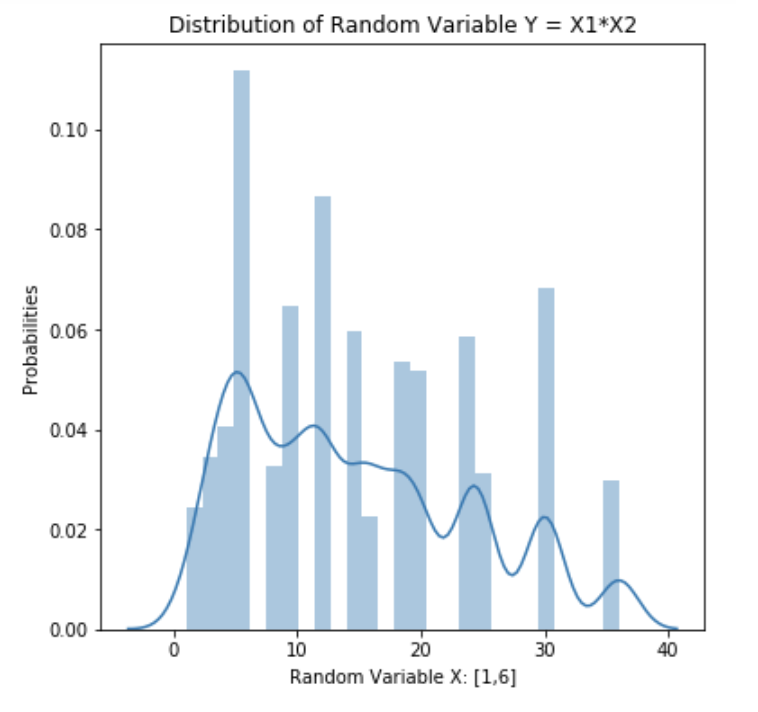

In [2]:
from IPython.display import Image

Image('images/samplingdist.png')

The mean and variance from the sampling distribution should be similar to the values calculated in the previous two parts.

Text(0.5, 1.0, 'Distribution of Random Variable Y=X1*X2')

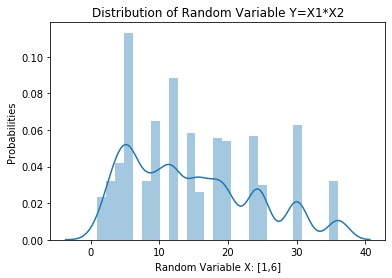

In [3]:
### BEGIN SOLUTION  
rolls = 10000
weighted = [1,2,3,3,3,4,4,4,5,5,5,5,6,6,6,6]
randomvardist = []
for x in range(rolls):
    first = random.randint(1,6)
    second = random.choice(weighted)
    prod = first*second
    randomvardist.append(prod)
df = pd.DataFrame(randomvardist,columns = ['count'])
sns.distplot(df['count'])
plt.ylabel('Probabilities')
plt.xlabel('Random Variable X: [1,6]')
plt.title('Distribution of Random Variable Y=X1*X2')
### END SOLUTION

$4.$  Suppose we flip a fair coin 10 times. The probability that all coin flips will be heads is less than 0.001. However, if we repeat the 10 coin flips 1000 times, then the probability that we obtain all heads at least once is about 0.62!

We want to run many replications simulating this experiment, flipping 10 fair coins 1000 times each, in order to better understand the probability of getting all heads. 

 - Use `np.random.binomial` to repeat 10 flips of a fair coin 1000 times, for 10000 replications 
 - For each of the 10000 replications, count the number of times you obtain all heads. 
 - Compute the frequency of getting all heads 0 times, 1 time, 2 times, etc. You should obtain something like the following:

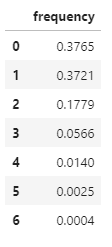

In [4]:
Image('images/table.PNG')

In [5]:
### BEGIN SOLUTION  
n = 10
p = 0.5
times = 1000
replications = 10000
x = np.array([sum(np.random.binomial(n,p,times) == 10) for x in range(replications)])

df1 = pd.DataFrame(x,columns=['frequency'])
frequency = df1.groupby('frequency')['frequency'].count()/replications
frequency = frequency.to_frame().rename_axis(None)
display(frequency)
### END SOLUTION

,frequency
0,0.3813
1,0.3668
2,0.1783
3,0.0587
4,0.0128
5,0.0017
6,0.0002
7,0.0002
